In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

sys.path.insert(0, '/home/josef/Projects/ana_cont_offdiag')
from ana_cont import continuation as cont

In [2]:
f = h5py.File('/home/josef/Downloads/sigma_cont.h5','r')
tail_0 = f['current_sigma/site_0/tail_0/value'][()]
tail_1 = f['current_sigma/site_0/tail_1/value'][()]
niw = 20
n_orb = 4
siw = (f['current_sigma/site_0/values/value'][...,:niw] - tail_0[:,:,None])
print(tail_0.real)
print(tail_0.imag)
for i in range(n_orb):
    siw[i,i] /= tail_1[i,i]

[[ 3.07701521e+000 -3.57758950e-001 -2.57631506e-134  7.34372271e-134]
 [-3.57758950e-001  3.92767686e+000  8.18214316e-134  9.03383479e-134]
 [-2.57631506e-134  8.18214316e-134  3.07281864e+000  3.69826955e-001]
 [ 7.34372271e-134  9.03383479e-134  3.69826955e-001  3.93201167e+000]]
[[ 0.00000000e+000 -6.10601401e-003  9.95714789e-134  1.46221491e-134]
 [ 6.10601401e-003  0.00000000e+000 -3.13486025e-135 -3.23761927e-133]
 [-9.95714789e-134  3.13486025e-135  0.00000000e+000  1.61150603e-003]
 [-1.46221491e-134  3.23761927e-133 -1.61150603e-003  0.00000000e+000]]


In [3]:
beta = 20.
iw = np.pi/beta * (2.*np.arange(niw) + 1.)
#wgrid = np.linspace(-15., 15., num=1001, endpoint=True)
wgrid = 20. * np.tan(np.linspace(-np.pi/2.5, np.pi/2.5, num=1001, endpoint=True))/np.tan(np.pi/2.5)
n_orb = 4
model_diag = np.exp(-wgrid**2/(2.*8**2))
model_diag /= np.trapz(model_diag, wgrid)
errfac = 0.005
err = 0.002 + errfac * iw**2./iw[-1]**2

In [12]:
sol_diag=[]
for i in range(n_orb):
    probl = cont.AnalyticContinuationProblem(im_axis=iw, re_axis=wgrid, im_data=siw[i,i], kernel_mode='freq_fermionic')
    sol_diag.append(
        probl.solve(method='maxent_svd', 
                    model=model_diag, 
                    stdev=err, 
                    alpha_determination='classic', 
                    offdiag=False, preblur=True, blur_width=0.15)[0])


spectral points: 1001
data points on imaginary axis: 40
significant singular values: 33
U (40, 33)
V (1001, 33)
Xi (33,)
Precomputation of coefficient matrices
Solving...
log10(alpha)=5.0000	chi2=1.2781e+04	S=-5.1245e-02	tr=1.5035	conv=0.000147,	nfev=6,	norm=0.9734330576172616
log10(alpha)=4.0000	chi2=1.4021e+03	S=-2.0553e-01	tr=3.1773	conv=0.000773,	nfev=7,	norm=0.9929455056439241
log10(alpha)=3.0000	chi2=1.1759e+02	S=-3.6065e-01	tr=5.2933	conv=0.00734,	nfev=9,	norm=1.024717439821001
log10(alpha)=2.0000	chi2=2.0058e+01	S=-4.7197e-01	tr=7.2876	conv=0.0772,	nfev=50,	norm=1.0518405335495757
log10(alpha)=1.0000	chi2=9.5092e+00	S=-5.2460e-01	tr=9.1285	conv=0.87,	nfev=178,	norm=1.0578874046384867
log10(alpha)=0.0000	chi2=9.4061e+00	S=-5.4116e-01	tr=10.8394	conv=10.0,	nfev=833,	norm=1.0548990041585238
prediction for optimal alpha: 8.770383632550427 log10(alphaOpt)= 0.9430185906129931
log10(alpha)=0.9430	chi2=9.4239e+00	S=-5.2608e-01	tr=9.2276	conv=1.0,	nfev=32,	norm=1.0576478299547032
log10(

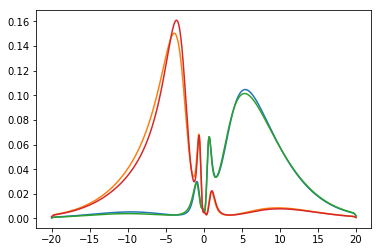

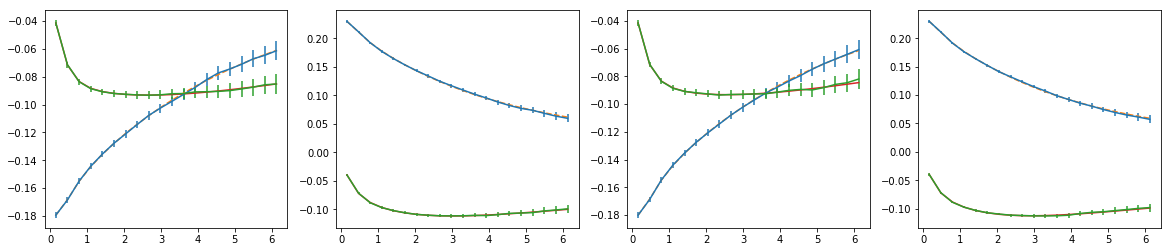

In [13]:
for i in range(n_orb):
    plt.plot(wgrid, sol_diag[i].A_opt)
plt.show()
fig,ax = plt.subplots(ncols=4, nrows=1, figsize=(20,4))
for i in range(n_orb):
    ax[i].errorbar(iw, siw[i,i].real, yerr=err)
    ax[i].plot(iw, sol_diag[i].backtransform.real, ls='--')
    ax[i].errorbar(iw, siw[i,i].imag, yerr=err)
    ax[i].plot(iw, sol_diag[i].backtransform.imag, ls='-')
plt.show()

In [14]:
sol_offd = []
for i in range(n_orb):
    sol_offd.append([])
    for j in range(i):
        s = siw[i,j]
        if np.any(np.abs(s)>0.00001) and np.all(np.isfinite(s)):
            model = np.sqrt(sol_diag[i].A_opt * sol_diag[j].A_opt)
            probl = cont.AnalyticContinuationProblem(im_axis=iw, re_axis=wgrid, im_data=s, kernel_mode='freq_fermionic')
            sol_offd[i].append(
            probl.solve(method='maxent_svd', 
                        model=model, 
                        stdev=err, 
                        alpha_determination='classic', 
                        offdiag=True, preblur=True, blur_width=0.15)[0])
        else:
            sol_offd[i].append(None)

spectral points: 1001
data points on imaginary axis: 40
significant singular values: 33
U (40, 33)
V (1001, 33)
Xi (33,)
Precomputation of coefficient matrices
Solving...
log10(alpha)=5.0000	chi2=4.2574e+02	S=-8.7749e-04	tr=1.4708	conv=0.00838,	nfev=4,	norm=0.02019629973793531
log10(alpha)=4.0000	chi2=8.6548e+01	S=-6.4110e-03	tr=3.6628	conv=0.0286,	nfev=6,	norm=0.04951737507350307
log10(alpha)=3.0000	chi2=7.8731e+00	S=-1.6561e-02	tr=5.8930	conv=0.178,	nfev=10,	norm=0.07759943758901643
log10(alpha)=2.0000	chi2=3.6319e+00	S=-2.2357e-02	tr=7.9115	conv=1.77,	nfev=24,	norm=0.09048498120021867
prediction for optimal alpha: 177.18046504192972 log10(alphaOpt)= 2.24841583723403
log10(alpha)=2.2484	chi2=3.8485e+00	S=-2.1485e-02	tr=7.4308	conv=0.976,	nfev=5,	norm=0.08857130752069953
log10(alpha)=2.2485	chi2=3.8486e+00	S=-2.1485e-02	tr=7.4307	conv=0.976,	nfev=3,	norm=0.08857091584978968
log10(alpha)=2.2380	chi2=3.8407e+00	S=-2.1526e-02	tr=7.4513	conv=1.0,	nfev=4,	norm=0.08866427267997387
log10(alp

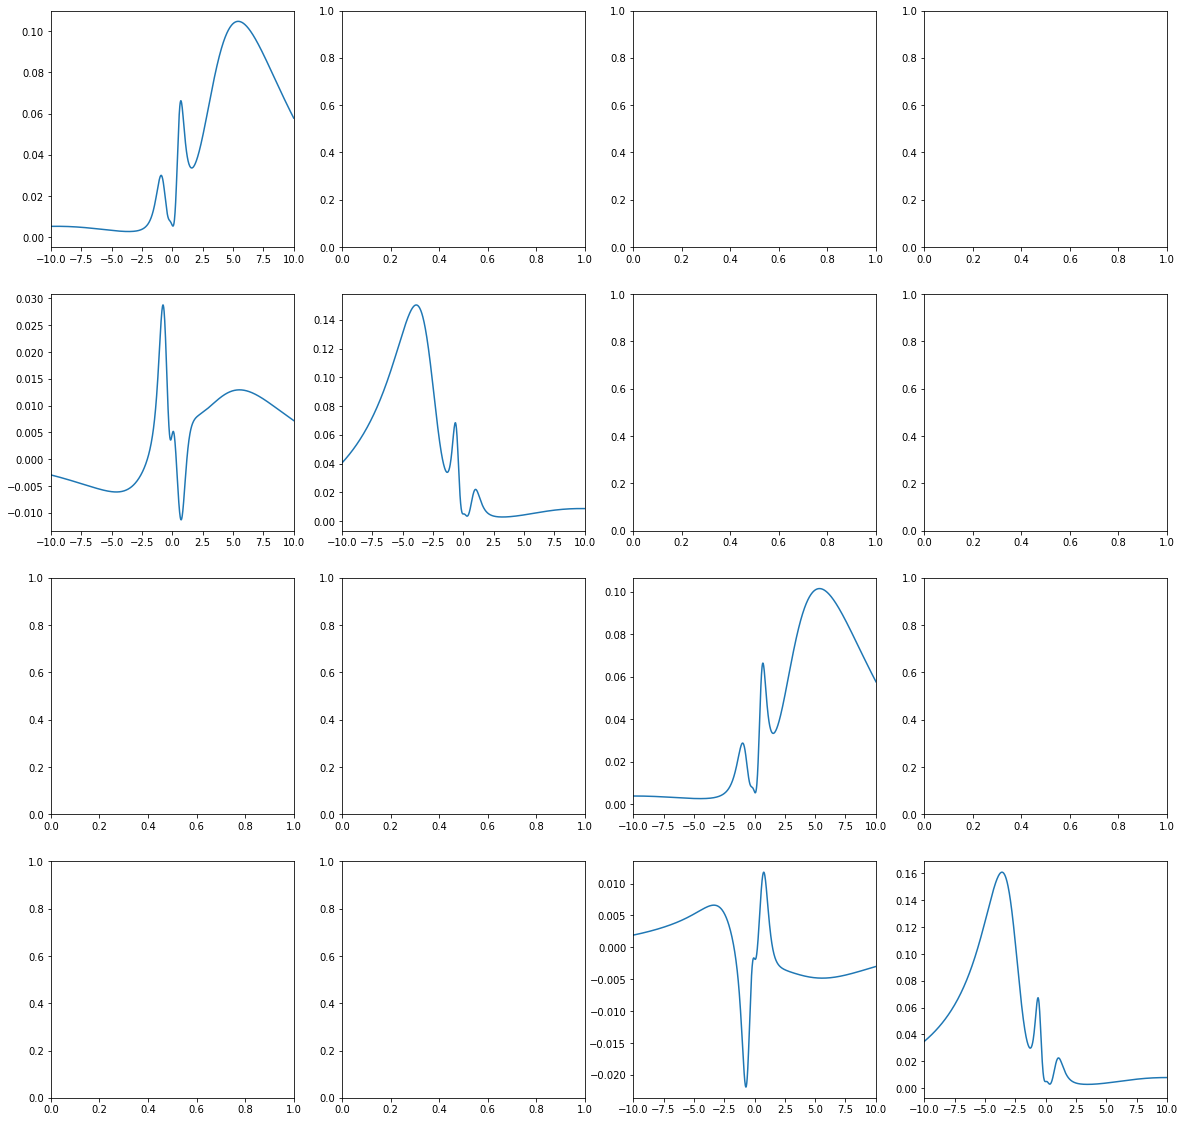

In [15]:
fig, ax = plt.subplots(nrows=n_orb, ncols=n_orb, figsize=(20,20))

for i in range(n_orb):
    ax[i,i].plot(wgrid, sol_diag[i].A_opt)
    ax[i,i].set_xlim(-10.,10.)
    for j in range(i):
        if sol_offd[i][j] is not None:
            ax[i,j].plot(wgrid, sol_offd[i][j].A_opt)
            ax[i,j].set_xlim(-10.,10.)
plt.show()

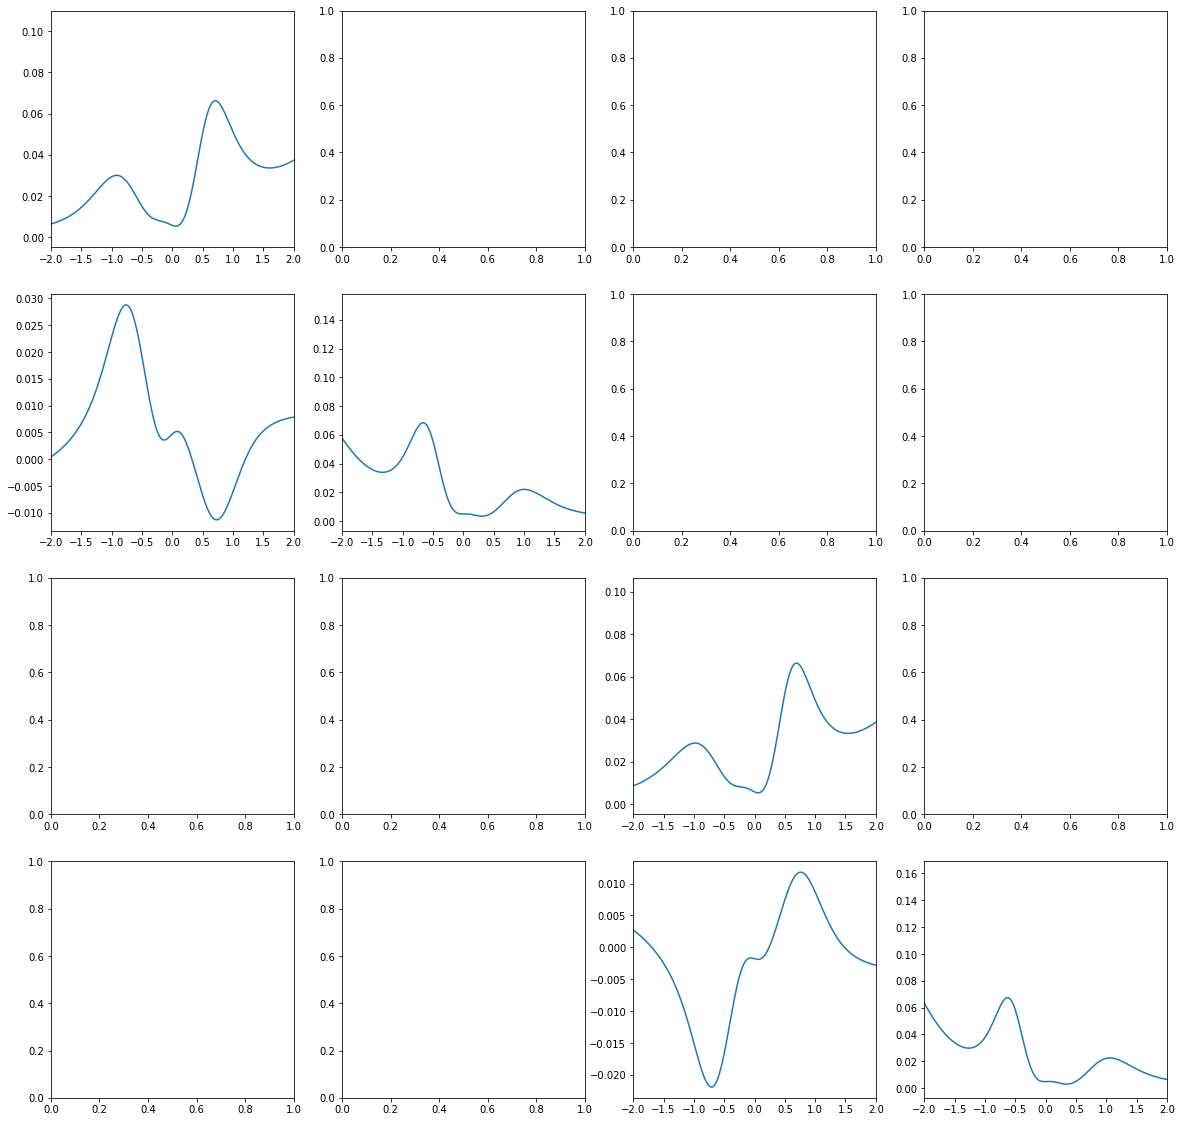

In [16]:
fig, ax = plt.subplots(nrows=n_orb, ncols=n_orb, figsize=(20,20))

for i in range(n_orb):
    ax[i,i].plot(wgrid, sol_diag[i].A_opt)
    ax[i,i].set_xlim(-2.,2.)
    for j in range(i):
        if sol_offd[i][j] is not None:
            ax[i,j].plot(wgrid, sol_offd[i][j].A_opt)
            ax[i,j].set_xlim(-2.,2.)
plt.show()

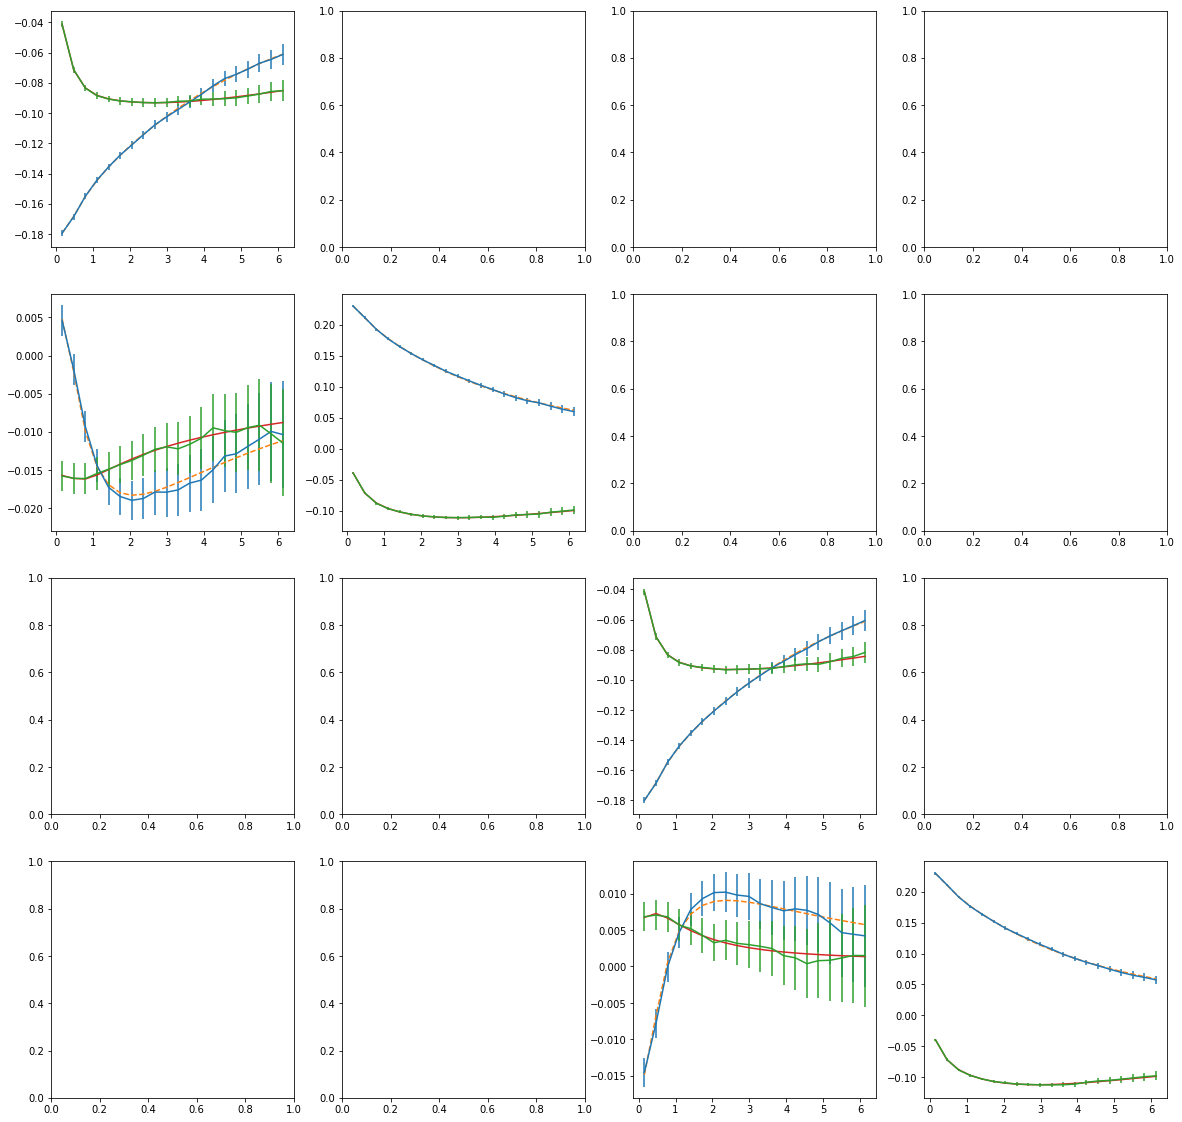

In [17]:
fig, ax = plt.subplots(nrows=n_orb, ncols=n_orb, figsize=(20,20))

for i in range(n_orb):
    ax[i,i].errorbar(iw, siw[i,i].real, yerr=err)
    ax[i,i].plot(iw, sol_diag[i].backtransform.real, ls='--')
    ax[i,i].errorbar(iw, siw[i,i].imag, yerr=err)
    ax[i,i].plot(iw, sol_diag[i].backtransform.imag, ls='-')
    for j in range(i):
        if sol_offd[i][j] is not None:
            ax[i,j].errorbar(iw, siw[i,j].real, yerr=err)
            ax[i,j].plot(iw, sol_offd[i][j].backtransform.real, ls='--')
            ax[i,j].errorbar(iw, siw[i,j].imag, yerr=err)
            ax[i,j].plot(iw, sol_offd[i][j].backtransform.imag, ls='-')
plt.show()